**Загрузка библиотек**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, freqz

**Исходные данные**

In [23]:
N = 2048  # число отсчётов
t = np.arange(0, N)  # вектор времени
L = 256  # Длина импульсной характеристики фильтра (порядок фильтра)
tf = np.arange(257, 513)  # Вектор времени графика отфильтрованного сигнала
Fs = 2048  # частота дискретизации
f = np.array([250, 500, 300, 350, 600, 650]) # частота функции многококомлексного сигнала
A = np.array([1.0, 0.2, 0.5, 0.3, 0.2, 0.8]) # амплитуды функций
indx1 = 1 # частота, подлежащая удалению из исходного сигнала
indx2 = 4 # частота, подлежащая удалению из исходного сигнала
fni = f / Fs #нормирование частот

**Формирование сигнала**

In [24]:
y = A[0] * np.cos(2 * np.pi * fni[0] * t) + A[1] * np.sin(2 * np.pi * fni[1] * t) - \
        A[2] * np.sin(2 * np.pi * fni[2] * t) + A[3] * np.cos(2 * np.pi * fni[3] * t) + \
        A[4] * np.sin(2 * np.pi * fni[4] * t) - A[5] * np.sin(2 * np.pi * fni[5] * t)
Xs = np.fft.fft(y, N)  # Вычисление спектра сигнала y
MXs = (2 / N) * np.abs(Xs)  # Вычисление спектра мощности y

**Построение графика сигнала на интервале отсчёта от 257 до 512**

Text(0.5, 1.0, 'График входного сигнала')

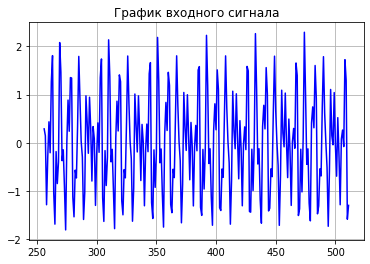

In [25]:
fig, ax = plt.subplots()
ax.plot(tf-1, y[tf], 'b')
ax.grid()
ax.set_title('График входного сигнала')

**Расчёт модуля спектра полученного сигнала и построение его графика**

Text(0.5, 1.0, 'График модуля спектра входного сигнала')

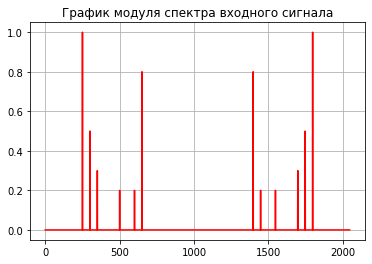

In [26]:
Xs = np.fft.fft(y, N) # вычисление спектра сигнала y
MXs = (2 / N) * np.abs(Xs) #вычисление спектра мощности y

fig, ax = plt.subplots()
ax.plot(t-1, MXs[t], 'r')
ax.grid()
ax.set_title('График модуля спектра входного сигнала')

**Расчёт двухполосного режекторного КИХ-фильтра для фильтрации сигнала**

In [27]:
f1s = fni[indx1-1]
f2s = fni[indx2-1]
L |= 1
Wn = np.array([1.8 * f1s, 2.2 * f1s, 1.8 * f2s, 2.2 * f2s])
b = firwin(L, Wn, pass_zero='bandstop') # Расчёт импульсной характеристики режекторного фильтра

**Расчёт модуля спектра сигнала после режекции и построение его графика**

Text(0.5, 1.0, 'График входного сигнала')

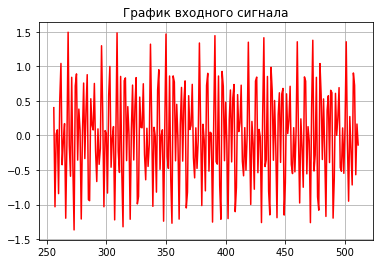

In [32]:
yf = lfilter(b, 1, y)
XF = np.fft.fft(yf, N)  # вычисление спектра сигнала
MXF = (2 / N) * np.abs(XF)  # вычисление спектра мощности

fig, ax = plt.subplots()
ax.plot(tf-1, yf[tf], 'r')
ax.grid()
ax.set_title('График входного сигнала')

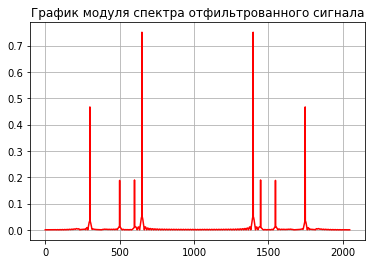

In [31]:
fig, ax = plt.subplots()
ax.plot(t-1, MXF[t], 'r')
ax.grid()
ax.set_title('График модуля спектра отфильтрованного сигнала')
plt.show()

**Построение АЧХ и ФЧХ полученного фильтра**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


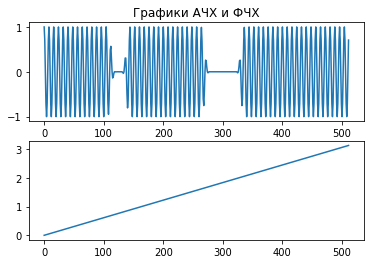

In [22]:
fig1, ax1 = plt.subplots(2)
f, h = freqz(b, 1)
ax1[0].plot(h)
ax1[1].plot(f)
ax1[0].set_title('Графики АЧХ и ФЧХ')
plt.show()
